In [136]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import numpy as np

In [137]:
# read data from csv
file= './rawData/p9_non_HMD_rotation.csv'
rawData = pd.read_csv(file, sep=",")
rawData.head(5)

,Var1,Var2,Var3,g,o
0,A2,0,615,n,NaN
1,A2,1,419,n,NaN
2,A2,2,384,n,NaN
3,A2,3,323,n,NaN
4,A2,4,246,n,NaN


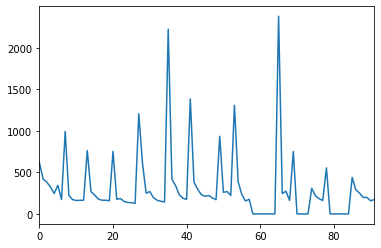

In [138]:
rawData['Var3'].plot()

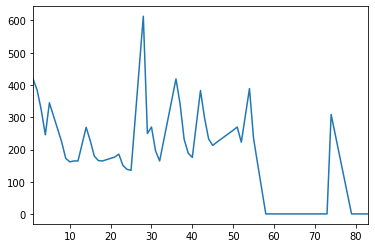

In [139]:
# filter fixed rotation range [1,5]
data_fixedRotation = rawData[(rawData.Var2 >=1) & (rawData.Var2 <=5 ) ]
data_fixedRotation.Var3.plot()

,Var1,Var2,Var3,g,o
1,A2,1,419,n,NaN
2,A2,2,384,n,NaN
3,A2,3,323,n,NaN
4,A2,4,246,n,NaN
5,A2,5,345,n,NaN


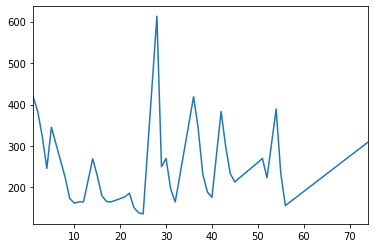

In [140]:
# filter remove outliner 
#rotationTime = data_fixedRotation.Var3
data_removeOutliber = data_fixedRotation[(data_fixedRotation.Var3!=1)& (data_fixedRotation.Var3<1000)]
data_removeOutliber.Var3.plot()
data_removeOutliber.head()

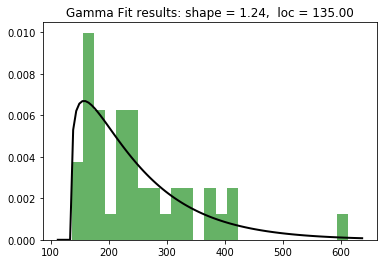

In [141]:
durations = data_removeOutliber.Var3


shape1, loc1, scale1 = stats.gamma.fit(durations)

plt.hist(durations, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
gamma =  stats.gamma(a=shape1, loc=loc1)
p = stats.gamma.pdf(x=x, a=shape1, loc=loc1, scale=scale1)
plt.plot(x, p, 'k', linewidth=2)
title = "Gamma Fit results: shape = %.2f,  loc = %.2f" % (shape1, loc1)
plt.title(title)

plt.show()



In [142]:
gammaList = []
for i in durations:
    p = gamma.pdf(i)
    gammaList.append(p)
# print(pdfList)
gammaEntropy = stats.entropy(gammaList)
print('Gamma entropy',gammaEntropy)

Gamma entropy 0.24069708436906248


In [143]:
valveIndex = data_removeOutliber.Var1
pureIndex = valveIndex.drop_duplicates()
pureIndex.head()
length = pureIndex.shape[0]
print(length)

9


In [144]:
# classfy the frame according to valve index
processedData = pd.Series([])
for k in pureIndex:
    #print(k)
    #index = k.to_string()
    curRotation = data_removeOutliber[data_removeOutliber.Var1 == k]
    curMean = curRotation.Var3.mean()
    #print(curMean)
    curPersentage = curRotation.Var3/curMean
    # print(curPersentage)
    processedData= pd.concat([processedData,curPersentage],axis = 0)
# processedData.head(10)
print(processedData)

1     1.220151
2     1.118229
3     0.940594
4     0.716366
5     1.004659
8     1.259843
9     0.973003
10    0.911136
11    0.928009
12    0.928009
14    1.334325
15    1.130952
16    0.892857
17    0.823413
18    0.818452
21    1.121673
22    1.178707
23    0.956907
24    0.880862
25    0.861850
28    2.051539
29    0.836680
30    0.903614
31    0.655957
32    0.552209
36    1.542710
37    1.259205
38    0.854197
39    0.695876
40    0.648012
42    1.418519
43    1.103704
44    0.862963
45    0.788889
46    0.825926
50    0.979284
51    1.016949
52    0.839925
74    1.163842
54    1.496154
55    0.903846
56    0.600000
dtype: float64


In [145]:
e = stats.entropy(processedData)
print(e)

3.7009948315794334


In [146]:
# normalize
df_norm = (processedData - processedData.mean()) / (processedData.max() - processedData.min())
e = stats.entropy(processedData)
print(e)

3.7009948315794334


In [147]:
pA = processedData/processedData.sum()
shannonE = -np.sum(pA*np.log2(pA))
print(shannonE)

5.339406889875333


In [148]:
mean = processedData.mean()
std = processedData.std()
print(mean,std)
normPdf= stats.norm(mean,std)
pdfList = []
for i in processedData:
    p = normPdf.pdf(i)
    pdfList.append(p)
# print(pdfList)
pdfEntropy = stats.entropy(pdfList)
print('Norm entropy',pdfEntropy)

1.0 0.2848825923218392
Norm entropy 3.6580529549188303


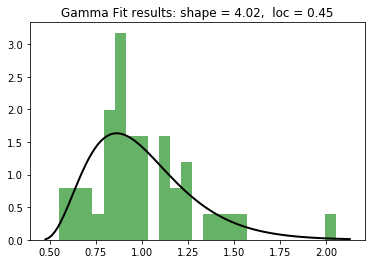

In [149]:
# fit ditribution


shape1, loc1, scale1 = stats.gamma.fit(processedData)
g1 = stats.gamma.pdf(x=x, a=shape1, loc=loc1, scale=scale1)

plt.hist(processedData, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.gamma.pdf(x=x, a=shape1, loc=loc1, scale=scale1)
plt.plot(x, p, 'k', linewidth=2)
title = "Gamma Fit results: shape = %.2f,  loc = %.2f" % (shape1, loc1)
plt.title(title)

plt.show()




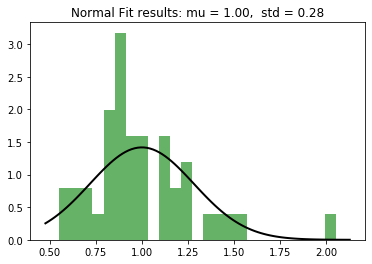

In [150]:
mu,std = stats.norm.fit(processedData)
g2 = stats.gamma.pdf(x,mu,std)
# Plot the histogram.
plt.hist(processedData, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Normal Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()